## Fetching Data from Internet

Here, we will download a single compressed file, **housing.tgz**, which contains a comma-separated values (CSV) file called **housing.csv** with all the data.

In [1]:
import os
import tarfile
import urllib

pwd = os.getcwd()

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

When we call **fetch_housing_data()**, it creates a datasets/housing
directory in our workspace, downloads the housing.tgz file, and extracts the
housing.csv file from it in this directory.

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd
import numpy as np

## Loading & Reading Data

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district. There are 10 attributes: longitude, latitude, housing_median_age,
total_rooms, total_bedrooms, population, households, median_income,
median_house_value, and ocean_proximity.

The **info()** method is useful to get a quick description of the data, in particular
the total number of rows, each attribute’s type, and the number of non-null values.

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by
Machine Learning standards. Notice that the **total_bedrooms** attribute has only **20,433** nonnull values, meaning that **207** districts are missing this feature. We will need to take care of this later.


All attributes are numerical, except the **ocean_proximity** field. Its type is
object, so it could hold any kind of Python object. But since we loaded this
data from a CSV file, we know that it is a text attribute. **We can find out what categories exist and how many
districts belong to each category by using the value_counts() method.**

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

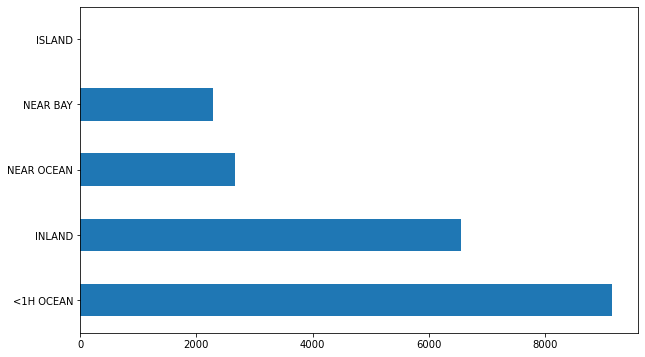

In [8]:
housing['ocean_proximity'].value_counts().plot(kind='barh', figsize=(10, 6))

The **describe()** method shows a summary of the
numerical attributes .

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640). We can see that
25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37.


Another quick way to get a feel of the type of data one is dealing with is to
plot a histogram for each numerical attribute. **A histogram shows the number of
instances (on the vertical axis) that have a given value range (on the horizontal
axis).** You can either plot this one attribute at a time, or you can call the hist()
method on the whole dataset and it
will plot a histogram for each numerical attribute.

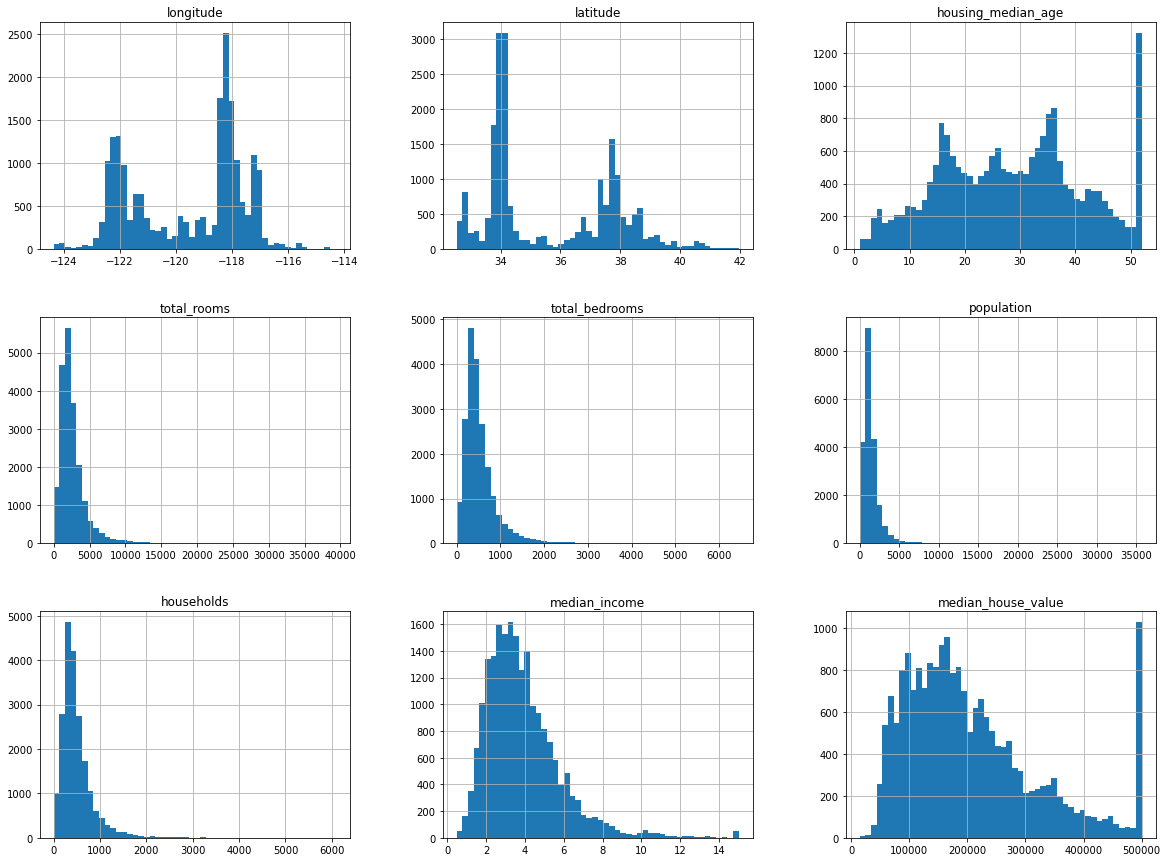

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

There are a few things you might notice in these histograms:

- First, the median income attribute does not look like it is expressed in US dollars (USD). The data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000).

- The housing median age and the median house value were also capped.
- Many histograms are tail-heavy: they extend much farther to
the right of the median than to the left. This may make it a bit harder
for some Machine Learning algorithms to detect patterns. We will try
transforming these attributes later on to have more bell-shaped
distributions.

## Splitting Data into Train and Test Sets

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

**So far we have considered purely random sampling methods. This is generally
fine if your dataset is large enough (especially relative to the number of
attributes), but if it is not, then the risk of introducing a significant sampling
bias is high. When a survey company decides to call 1,000 people to ask them a few
questions, they don’t just pick 1,000 people randomly in a phone book. They try
to ensure that these 1,000 people are representative of the whole population. For
example, the US population is 51.3% females and 48.7% males, so a wellconducted survey in the US would try to maintain this ratio in the sample: 513
female and 487 male. This is called stratified sampling: the population is
divided into homogeneous subgroups called strata, and the right number of
instances are sampled from each stratum to guarantee that the test set is
representative of the overall population. If the people running the survey used
purely random sampling, there would be about a 12% chance of sampling a
skewed test set that was either less than 49% female or more than 54% female.
Either way, the survey results would be significantly biased.**


*We know that the median income is a
very important attribute to predict median housing prices. So, we want to
ensure that the test set is representative of the various categories of incomes in
the whole dataset. Since the median income is a continuous numerical attribute,
we need to create an income category attribute. Looking at the median
income histogram more closely: most median income
values are clustered around 1.5 to 6 (i.e., $15,000–$60,000), but some median
incomes go far beyond 6. It is important to have a sufficient number of
instances in our dataset for each stratum, or else the estimate of a stratum’s
importance may be biased. This means that we should not have too many
strata, and each stratum should be large enough. The following code uses the
pd.cut() function to create an income category attribute with five categories
(labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000),category 2 from 1.5 to 3, and so on:*

In [12]:
housing['income_category'] = pd.cut(housing["median_income"],
                                        bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                        labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

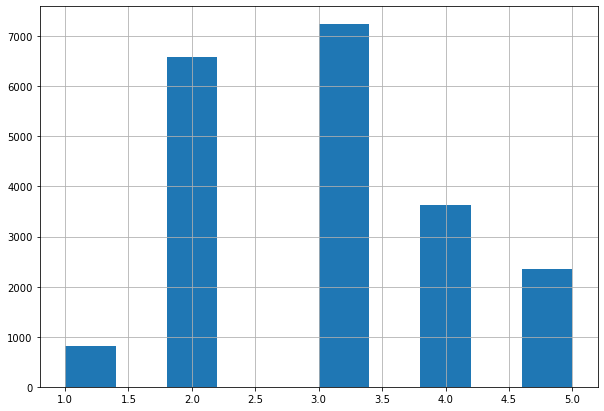

In [13]:
housing['income_category'].hist(figsize=(10, 7))

Now we are ready to do stratified sampling based on the income category.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

**Let’s see if this worked as expected. We can start by looking at the income
category proportions in the test set:**

In [15]:
strat_test_set['income_category'].value_counts()/len(strat_test_set) 

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

We can measure the income category proportions in the full dataset.

In [16]:
housing['income_category'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_category, dtype: float64

**We can see that both the Test Set and the Full Dataset have equal proportions of income distribution.**

The table compares the income category proportions in the overall
dataset, in the test set generated with stratified sampling, and in a test set
generated using purely random sampling. As you can see, the test set generated
using stratified sampling has income category proportions almost identical to
those in the full dataset, whereas the test set generated using purely random
sampling is skewed.


In [17]:
def income_cat_proportions(data):
    return data["income_category"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # Random Sampling

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [18]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


Now we should remove the income_cat attribute so the data is back to its
original state:

In [19]:
strat_train_set.drop('income_category', axis=1, inplace=True)
strat_test_set.drop('income_category', axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

Make sure you have put the test set aside and you are only exploring the
training set. Let’s create a copy so that
we can play with it without harming the training set.


In [20]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

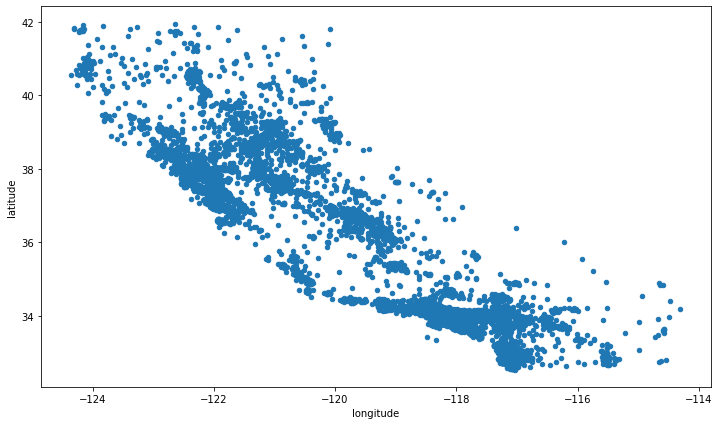

In [21]:
#Since, there is Geographical data present
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(12, 7))

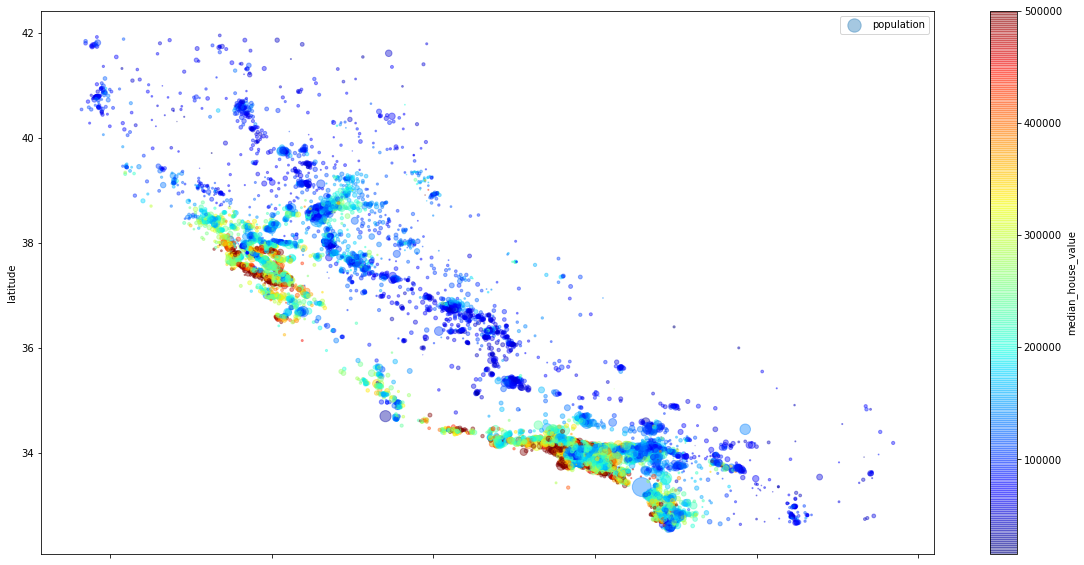

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                            s=housing["population"]/100, label="population", figsize=(20,10),
                            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
                            )
plt.legend()

- The radius of each circle
represents the district’s population (option s), and the color represents the price
(option c). We will use a predefined color map (option cmap) called jet, which
ranges from blue (low values) to red (high prices).

- This image also tells us that the housing prices are very much related to the
location (e.g., close to the ocean) and to the population density, as you probably
knew already.

## Looking for Correlations

In [23]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


**Now let’s look at how much each attribute correlates with the median house
value:**


In [24]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means
that there is a strong positive correlation; for example, the median house value
tends to go up when the median income goes up. When the coefficient is close
to –1, it means that there is a strong negative correlation; you can see a small
negative correlation between the latitude and the median house value (i.e.,
prices have a slight tendency to go down when you go north). Finally,
coefficients close to 0 mean that there is no linear correlation.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

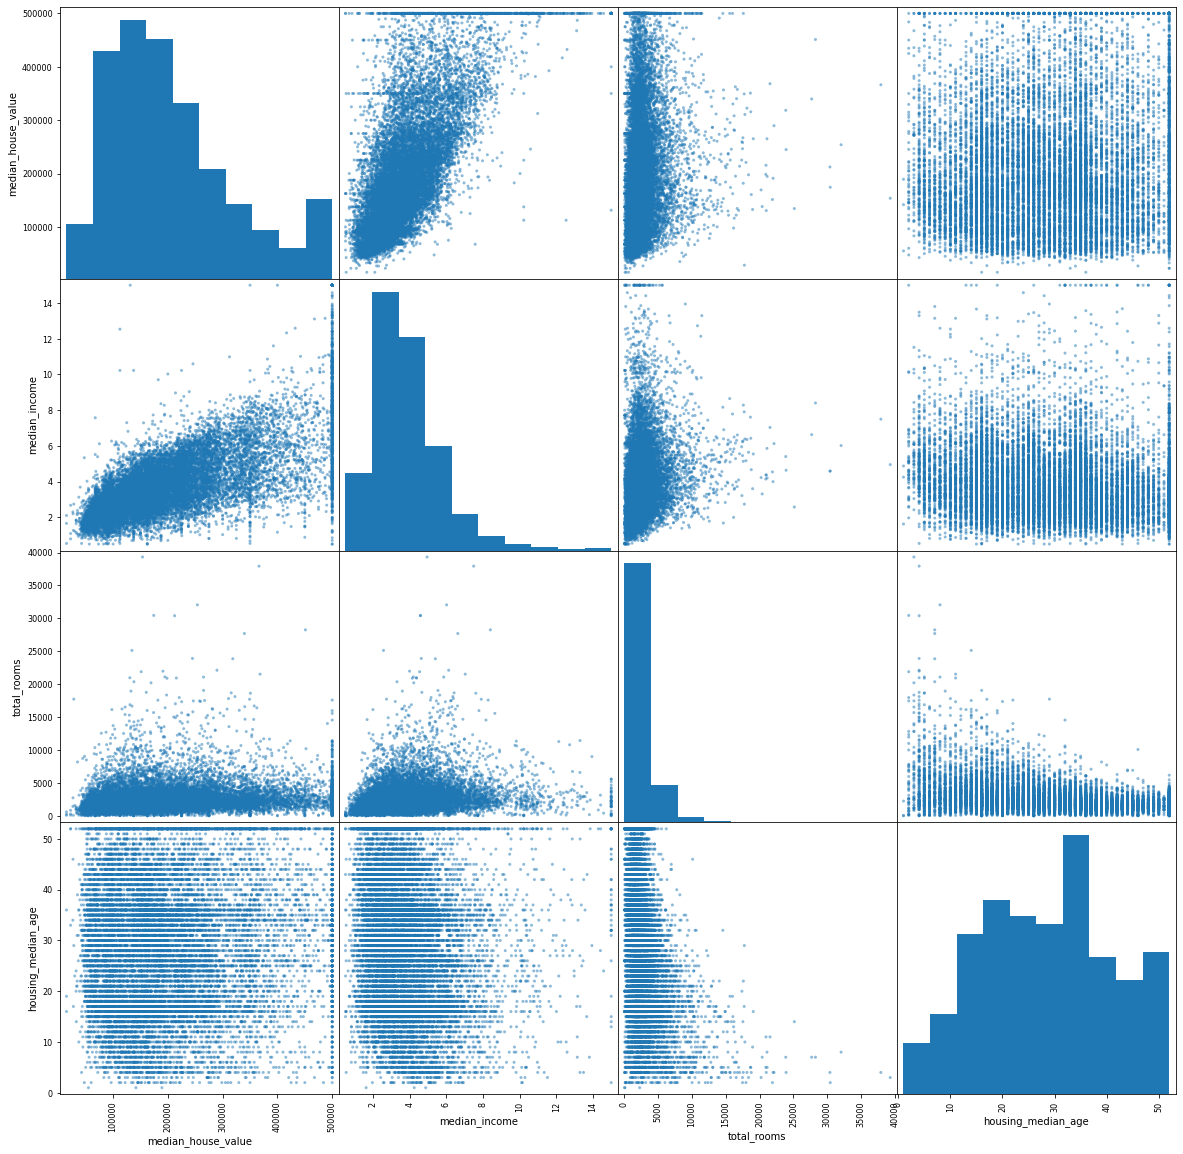

In [25]:
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function.
# Let us just select a few important features.
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(20, 20))

**The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot.**

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

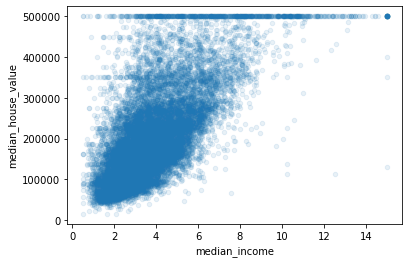

In [26]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

This plot reveals a few things:

- First, the correlation is indeed very strong; you can clearly see the upward trend, and the points are not too dispersed. 

- Second, the price cap that we noticed earlier is clearly visible as a horizontal line at 500,000. But this plot reveals other less obvious straight lines: a horizontal line around 450,000, another around 350,000, perhaps one around $280,000, and a few more below that. We may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

## Experimenting with Attribute Combinations

One last thing you may want to do before preparing the data for Machine
Learning algorithms is to try out various attribute combinations. For example,
the total number of rooms in a district is not very useful if you don’t know how
many households there are. What you really want is the number of rooms per
household. Similarly, the total number of bedrooms by itself is not very useful:
you probably want to compare it to the number of rooms. And the population
per household also seems like an interesting attribute combination to look at.

In [27]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [28]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [29]:
# Creating a Function. Will come in handy later.
def feature_engineering(data):
    data["rooms_per_household"] = data["total_rooms"]/data["households"]
    data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
    data["population_per_household"]=data["population"]/data["households"]
    return data

In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

The new bedrooms_per_room attribute is much more correlated
with the median house value than the total number of rooms or bedrooms.
Apparently houses with a lower bedroom/room ratio tend to be more expensive.

## Data Preparation

In [31]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning and Handling Missing Values

We saw earlier that the total_bedrooms attribute has some missing values, so let’s fix this.

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [33]:
# Since the median can only be computed on numerical attributes, you need tocreate a copy of the data without the 
# text attribute ocean_proximity:

housing_num = housing.drop("ocean_proximity", axis=1)

In [34]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the
result in its statistics_ instance variable. Only the total_bedrooms attribute
had missing values, but we cannot be sure that there won’t be any missing
values in new data after the system goes live, so it is safer to apply the imputer
to all the numerical attributes:

In [35]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [36]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [37]:
X = imputer.transform(housing_num)

# The result is a plain NumPy array containing the transformed features. If you want to put it back into a pandas DataFrame:

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


### Encoding Categorical Variables

In [38]:
housing_cat = housing['ocean_proximity']
housing_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

In [39]:
type(housing_cat)

pandas.core.series.Series

In [40]:
housing_cat = housing_cat.values.reshape(-1, 1)

In [41]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

One issue with this representation is that ML algorithms will assume that two
nearby values are more similar than two distant values. This may be fine in
some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and
“excellent”), but it is obviously not the case for the ocean_proximity column
(for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To handle this we will use **One Hot Encoding.**

In One Hot Encoding, we create one binary attribute per
category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0
otherwise), another attribute equal to 1 when the category is “INLAND” (and 0
otherwise), and so on. Only one
attribute will be equal to 1 (hot), while the others will be 0 (cold). The new
attributes are sometimes called dummy attributes.

In [42]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
housing_cat_1hot = ohe.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Once again, you can get the list of categories using the encoder’s categories_
instance variable.

In [44]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Scaling our Data

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_tr)
housing_scaled

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.63621141,
        -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.99833135,
        -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.43363936,
        -0.0933178 , -0.5320456 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.60790363,
         0.71315642, -0.3167053 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.05717804,
        -0.37545069,  0.09812139],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.13515931,
         0.3777909 , -0.15779865]])

In [46]:
housing_scaled = pd.DataFrame(housing_scaled, columns=housing_num.columns, index=housing_num.index)
housing_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459
14650,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566
3555,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437


### Pipelines

#### 1. A pipeline is the set of processes that convert raw data into actionable format required to answer business questions. Data                    science pipelines automate the flow of data from source to destination, ultimately providing you insights. 
#### 2. Piplines also allow us to easily apply a set of transformations one after another.

In [47]:
def data_transformation(data):
    
    # Seperate Labels
    if 'median_house_value' in data.columns:
        labels = data['median_house_value']
        data = data.drop('median_house_value', axis = 1)
        
    else:
        
        labels = None
        
        
    # Feature Engineering
    fed = feature_engineering(data)
    features = fed.columns.to_list()
    features.remove('ocean_proximity')
    fedc = fed['ocean_proximity'].copy()
    fed = fed.drop('ocean_proximity', axis = 1)
    
    
    # Handling Missing Values
    from sklearn.impute import SimpleImputer
    imp = SimpleImputer(strategy='median')
    data_imp = imp.fit_transform(fed)
    
    
    # Scaling/Normalizing Data
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    scaled_data = sc.fit_transform(data_imp)
    
    
    # Encoding Categorical Variables
    from sklearn.preprocessing import OneHotEncoder
    enc = OneHotEncoder(sparse=False)
    arr = fedc.values
    arr = arr.reshape(-1, 1)
    data_e = enc.fit_transform(arr)
    features = features + enc.categories_[0].tolist()
    
    output = np.hstack((scaled_data, data_e))
    
    return output, labels, features

## Select and Train a Model

At last! You framed the problem, you got the data and explored it, you sampled
a training set and a test set, and you wrote transformation pipelines to clean up
and prepare your data for Machine Learning algorithms automatically. You are
now ready to select and train a Machine Learning model.

In [48]:
train_data, train_labels, features = data_transformation(strat_train_set)

In [49]:
test_data, test_labels, features = data_transformation(strat_test_set)

In [50]:
pd.DataFrame(train_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,0.193805,-0.086499,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.940745,-0.033534,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,0.499160,-0.092405,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,-0.208675,0.089736,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,0.324937,-0.004194,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.474576,-0.031755,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.578453,0.084689,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.580895,-0.030554,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,-0.331047,0.061509,1.0,0.0,0.0,0.0,0.0


### Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(train_data, train_labels)

LinearRegression()

In [52]:
original_values = train_labels[:5]
predicted_values = LR.predict(train_data)[:5]

In [53]:
comparison_df = pd.DataFrame(data={'Original Values': original_values,
                            'Predicted Values': predicted_values})

In [54]:
comparison_df['% Change'] = ((comparison_df['Predicted Values'] - comparison_df['Original Values']) /  comparison_df['Original Values']) * 100

In [55]:
comparison_df

,Original Values,Predicted Values,% Change
17606,286600.0,209375.742680,-26.944961
18632,340600.0,315154.783192,-7.470704
14650,196900.0,210238.278564,6.774138
3230,46300.0,55902.615733,20.739991
3555,254500.0,183416.687189,-27.930575


In [56]:
original_values = train_labels
predicted_values = LR.predict(train_data)

In [57]:
# Let’s measure this regression model’s RMSE on the whole training set.

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68161.22644433199

This is better than nothing, but clearly not a great score: most districts’
median_housing_values range between 120,000 and 265,000, so a typical
prediction error of $68,161 is not very satisfying. This is an example of a model
underfitting the training data. When this happens it can mean that the features
do not provide enough information to make good predictions, or that the model
is not powerful enough. Let’s try a more complex model to see
how it does.

### Decision Trees

In [58]:
# Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding complex nonlinear relationships 
# in the data. 

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(train_data, train_labels)

DecisionTreeRegressor()

In [59]:
predictions = tree.predict(train_data)

In [60]:
tree_mse = mean_squared_error(train_labels, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Wait, what!? No error at all? Could this model really be absolutely perfect? Of
course, it is much more likely that the model has badly overfit the data.

## Better Evaluation Using Cross-Validation

#### One way to evaluate the Decision Tree model would be to use the train_test_split() function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set. It’s a bit of work, but nothing too difficult, and it would work fairly well. A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. It randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, train_data, train_labels, scoring = 'neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [62]:
def display_scores(scores):
    
    print('Scores:', scores)
    
    print('Mean:', scores.mean())
    
    print('Standard Deviation:', scores.std())

In [63]:
display_scores(tree_rmse_scores)

Scores: [70608.61941798 68227.78351512 68868.24935623 68130.24540704
 69126.7319218  74953.61817775 70641.81516599 69655.68276553
 76663.70982835 70428.53742105]
Mean: 70730.49929768371
Standard Deviation: 2708.722994952728


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to
perform worse than the Linear Regression model! Notice that cross-validation
allows you to get not only an estimate of the performance of your model, but
also a measure of how precise this estimate is (i.e., its standard deviation). The
Decision Tree has a score of approximately 70,730, generally ±2,708. You
would not have this information if you just used one validation set. But crossvalidation
comes at the cost of training the model several times, so it is not
always possible.

In [64]:
# Let’s compute the same scores for the Linear Regression model just to be sure:

scores = cross_val_score(LR, train_data, train_labels, scoring = 'neg_mean_squared_error', cv=10)

LR_rmse_scores = np.sqrt(-scores)

In [65]:
display_scores(LR_rmse_scores)

Scores: [66060.65470195 66764.30726969 67721.72734022 74719.28193624
 68058.11572078 70909.35812986 64171.66459204 68075.65317717
 71024.84033989 67300.24394751]
Mean: 68480.58471553597
Standard Deviation: 2845.584309265084


That’s right: the Decision Tree model is overfitting so badly that it performs
worse than the Linear Regression model.

### Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(train_data, train_labels)

RandomForestRegressor()

In [67]:
pred = forest.predict(train_data)

In [68]:
forest_mse = mean_squared_error(train_labels, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18736.1494710524

In [69]:
scores = cross_val_score(forest, train_data, train_labels, scoring = 'neg_mean_squared_error', cv = 10)

forest_rmse_scores = np.sqrt(-scores)

In [70]:
display_scores(forest_rmse_scores)

Scores: [49927.30381727 47559.64857678 49544.9212505  52695.86156468
 49663.69703484 53057.97053165 48884.97107422 47843.28677761
 53049.19745492 50143.81700355]
Mean: 50237.06750860113
Standard Deviation: 1937.7984762863177


Wow, this is much better: Random Forests look very promising. However, note
that **the score on the training set is still much lower than on the validation sets,
meaning that the model is still overfitting the training set. Possible solutions for
overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot
more training data.**

## Fine-Tune Our Model

### Grid Search

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

forest_r = RandomForestRegressor()

grid_search = GridSearchCV(forest_r, param_grid, cv= 5 , scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations
of n_estimators and max_features hyperparameter values specified in the
first dict, then try all 2 × 3 = 6 combinations of
hyperparameter values in the second dict, but this time with the bootstrap
hyperparameter set to False instead of True (which is the default value for this
hyperparameter).

The grid search will explore 12 + 6 = 18 combinations of
RandomForestRegressor hyperparameter values, and it will train each model 5
times (since we are using five-fold cross validation). In other words, all in all,
there will be 18 × 5 = 90 rounds of training.

In [72]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [73]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [74]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
            print(np.sqrt(-mean_score), params)

64197.93547586106 {'max_features': 2, 'n_estimators': 3}
55471.64618672028 {'max_features': 2, 'n_estimators': 10}
53157.38801755515 {'max_features': 2, 'n_estimators': 30}
60655.85905140506 {'max_features': 4, 'n_estimators': 3}
53124.526338112846 {'max_features': 4, 'n_estimators': 10}
50315.686490223066 {'max_features': 4, 'n_estimators': 30}
58798.57245578784 {'max_features': 6, 'n_estimators': 3}
52244.056380803864 {'max_features': 6, 'n_estimators': 10}
50115.29114838872 {'max_features': 6, 'n_estimators': 30}
59055.20383410759 {'max_features': 8, 'n_estimators': 3}
52088.14521402695 {'max_features': 8, 'n_estimators': 10}
49867.28808869714 {'max_features': 8, 'n_estimators': 30}
62280.542277867105 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54373.87829297959 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60420.33306818436 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53233.884388174134 {'bootstrap': False, 'max_features': 3, 'n_estimators

In this example, we obtain the best solution by setting the max_features
hyperparameter to 8 and the n_estimators hyperparameter to 30. The RMSE
score for this combination is 49,867, which is slightly better than the score you
got earlier using the default hyperparameter values (which was 50,172).

### Randomized Search
The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead.
This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
1. If you let the randomized search run for, say, 1,000 iterations, this
   approach will explore 1,000 different values for each hyperparameter
   (instead of just a few values per hyperparameter with the grid search
   approach).
2. Simply by setting the number of iterations, you have more control over
   the computing budget you want to allocate to hyperparameter search.

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200), 
    'max_features': randint(low=1, high=8)}

forest_ra = RandomForestRegressor(random_state=42)

rnd_search = RandomizedSearchCV(forest_ra, param_distributions=param_distribs,
                    n_iter=10, cv = 5, scoring = 'neg_mean_squared_error', random_state=42)

rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001940E575610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001940E56ED00>},
                   random_state=42, scoring='neg_mean_squared_error')

### Feature Importance

##### Let’s display these importance scores next to their corresponding attribute names.

In [76]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.29322026e-02, 6.72464548e-02, 4.50399861e-02, 1.58909569e-02,
       1.56329070e-02, 1.61769691e-02, 1.51026505e-02, 3.61184704e-01,
       5.51285964e-02, 6.87017844e-02, 1.16058322e-01, 3.57295814e-03,
       1.51236684e-01, 7.82863544e-05, 1.68959036e-03, 4.32694761e-03])

In [77]:
sorted(zip(feature_importances, features), reverse=True)

[(0.36118470396640456, 'median_income'),
 (0.15123668408625354, 'INLAND'),
 (0.11605832163339717, 'population_per_household'),
 (0.06870178439487774, 'bedrooms_per_room'),
 (0.0672464548240547, 'latitude'),
 (0.06293220255495091, 'longitude'),
 (0.05512859643808013, 'rooms_per_household'),
 (0.04503998614524376, 'housing_median_age'),
 (0.016176969122359726, 'population'),
 (0.01589095686398594, 'total_rooms'),
 (0.015632907041011522, 'total_bedrooms'),
 (0.01510265046463149, 'households'),
 (0.004326947611210022, 'NEAR OCEAN'),
 (0.003572958140260972, '<1H OCEAN'),
 (0.0016895903588958834, 'NEAR BAY'),
 (7.828635438188224e-05, 'ISLAND')]

With this information, you may want to try dropping some of the less useful
features (e.g., apparently only one ocean_proximity category is really useful,
so you could try dropping the others).

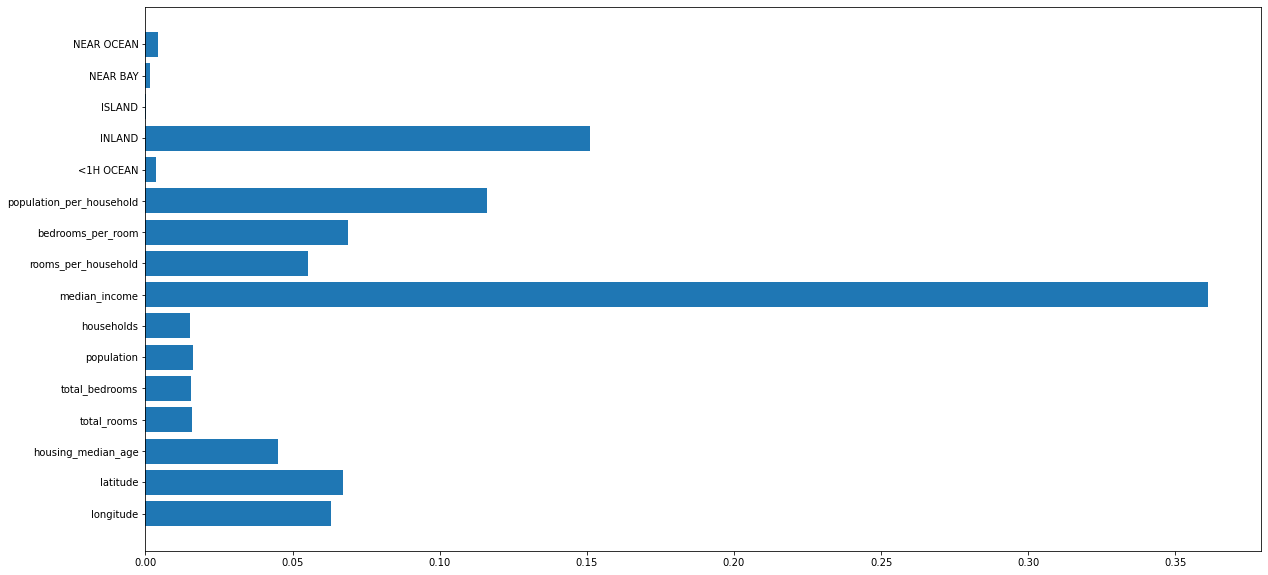

In [78]:
plt.figure(figsize=(20, 10))
plt.barh(y=features, width=feature_importances)
plt.show()

### Final System

In [79]:
final_model = grid_search.best_estimator_

In [80]:
final_predictions = final_model.predict(test_data)

In [81]:
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

69430.8728912941

In some cases, such a point estimate of the generalization error will not be quite
enough to convince you to launch: what if it is just 0.1% better than the model
currently in production? You might want to have an idea of how precise this
estimate is. For this, you can compute a 95% confidence interval for the
generalization error using scipy.stats.t.interval():

In [82]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - test_labels) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([67471.07600888, 71336.84968583])

### Launch!

You now need to get your solution ready
for production (e.g., polish the code, write documentation and tests, and so on).
Then you can deploy your model to your production environment. One way to
do this is to save the trained Scikit-Learn model (e.g., using joblib), including
the full preprocessing and prediction pipeline, then load this trained model
within your production environment and use it to make predictions by calling
its predict() method.